<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/Money_AI_baocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [54]:
trainset='/content/drive/MyDrive/Money'

In [55]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 979 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


In [56]:
{'.ipynb_checkpoints': 0,
 '5000': 1,
 '10000': 2,
 '20000': 3,
 '50000': 4,
 '100000': 5,
 '200000': 6,
 '500000': 7}

{'.ipynb_checkpoints': 0,
 '5000': 1,
 '10000': 2,
 '20000': 3,
 '50000': 4,
 '100000': 5,
 '200000': 6,
 '500000': 7}

In [57]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
8/8 [==============================] - 141s 17s/step - loss: 2.9573 - accuracy: 0.2462 - val_loss: 1.8664 - val_accuracy: 0.3048
Epoch 2/50
8/8 [==============================] - 209s 27s/step - loss: 1.8348 - accuracy: 0.3003 - val_loss: 1.7830 - val_accuracy: 0.3048
Epoch 3/50
8/8 [==============================] - 120s 15s/step - loss: 2.1640 - accuracy: 0.3422 - val_loss: 2.1570 - val_accuracy: 0.2000
Epoch 4/50
8/8 [==============================] - 120s 15s/step - loss: 1.9631 - accuracy: 0.2165 - val_loss: 1.8637 - val_accuracy: 0.3048
Epoch 5/50
8/8 [==============================] - 122s 15s/step - loss: 1.8810 - accuracy: 0.2901 - val_loss: 1.9038 - val_accuracy: 0.2000
Epoch 6/50
8/8 [==============================] - 122s 15s/step - loss: 1.8830 - accuracy: 0.2789 - val_loss: 1.8453 - val_accuracy: 0.3048
Epoch 7/50
8/8 [==============================] - 121s 15s/step - loss: 1.8022 - accuracy: 0.3003 - val_loss: 1.6857 - val_accuracy: 0.3048
Epoch 8/50
8/8 [====

In [59]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 979 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


In [60]:
model.save('monan14.hs')

In [61]:
model1=load_model('monan14.hs')

In [78]:
label = ['5000VND','10000VND','200000VND','50000VND','100000VND','20000VND','500000VND']


1/1 [==============================] - 0s 100ms/step
20000VND


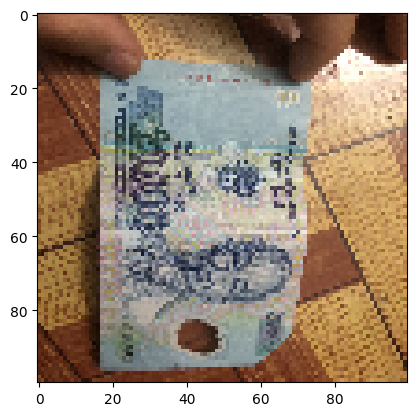

In [74]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Money/20k.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 47ms/step
10000VND


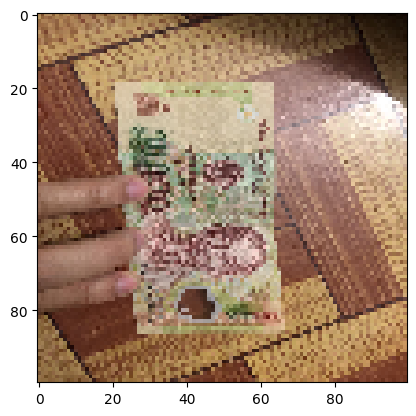

In [79]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Money/10k.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 56ms/step
5000VND


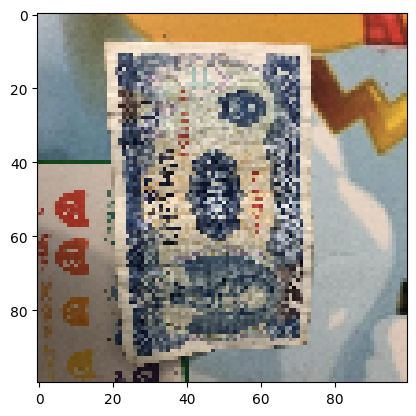

In [76]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Money/5k.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])